In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})


### 1 - Validation Plot

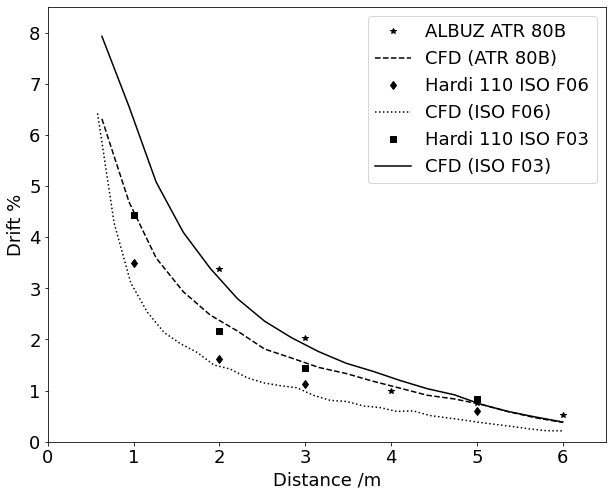

In [8]:
ss = 19

fo6 = np.load('1_2_0_5.0_0_0_n_f06.npy')
fo3 = np.load('2_2_0_3.0_0_0_n_f03.npy')
albuz = np.load('3_2_0_2.5_0_0_n_albuz.npy')

fo6 = fo6[:,:,ss] / 0.095 * 100
fo3 = fo3[:,:,ss] / 0.095 * 100
albuz = albuz[:,:,ss] / 0.095 * 100

x1 = np.linspace(0,6,20)
x2 = np.linspace(0,6,32)

trx = [2, 3, 4, 5, 6]
trd = [3.38, 2.03, 1.00, 0.76, 0.52]
torrent = pd.DataFrame({'distance' : trx, 'drift' : trd})

nu06x = [1, 2, 3, 5]
nu06d = [3.502, 1.61, 1.13, 0.61]
nuyttens_tunnel_06 = pd.DataFrame({'distance' : nu06x, 'drift' : nu06d})

nu03x = [1, 2, 3, 5]
nu03d = [6.69, 3.27, 2.175, 1.327]
nuyttens_tunnel_03 = pd.DataFrame({'distance' : nu03x, 'drift' : nu03d})

nu06x = [1, 2, 3, 5]
nu06d = [2.934, 1.116, 0.918, 0.558]
nuyttens_field_06 = pd.DataFrame({'distance' : nu06x, 'drift' : nu06d})

nu03x = [1, 2, 3, 5]
nu03d = [4.428, 2.16, 1.44, 0.846]
nuyttens_field_03 = pd.DataFrame({'distance' : nu03x, 'drift' : nu03d})


plt.figure(figsize=(10,8))

# tunnel exps
#plt.plot(nuyttens_tunnel_03['distance'], nuyttens_tunnel_03['drift'], 'sk')
a1, = plt.plot(nuyttens_tunnel_06['distance'], nuyttens_tunnel_06['drift'], 'dk', label = 'Hardi 110 ISO F06')
b1, = plt.plot(torrent['distance'], torrent['drift'], '*k', label = 'ALBUZ ATR 80B')

# field
c1, = plt.plot(nuyttens_field_03['distance'], nuyttens_field_03['drift'], 'sk', label = 'Hardi 110 ISO F03')
#plt.plot(nuyttens_field_06['distance'], nuyttens_field_06['drift'], 'dk', fillstyle = 'none')
# axis settings
plt.ylim([0, 8.5])
plt.xlim([0, 6.5])
# data
a, = plt.plot(x2[3:], fo6[3:], 'k:', label = 'CFD (ISO F06)')
b, = plt.plot(x1[2:], fo3[2:], 'k--', label = 'CFD (ATR 80B)')
c, = plt.plot(x1[2:], albuz[2:], 'k', label = 'CFD (ISO F03)')
plt.ylabel('Drift %')
plt.xlabel('Distance /m')
plt.legend(handles = [ b1, b, a1, a, c1, c])


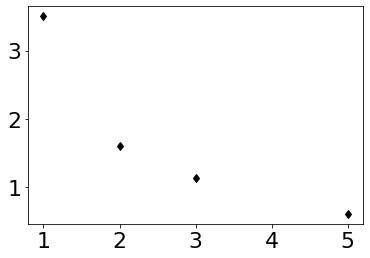

In [3]:
plt.plot(nuyttens_tunnel_06['distance'], nuyttens_tunnel_06['drift'], 'dk')

In [4]:
for i in [335, 431, 434, 436]:
    nm = str(i)
    d = np.load((nm + '.npy'))
    d = d[:,:,19] / 0.095 * 100
    plt.figure(figsize=(2,12))
    plt.imshow(np.log(d+1), cmap = 'inferno')  
    

FileNotFoundError: [Errno 2] No such file or directory: '335.npy'

C:\Users\klotz\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


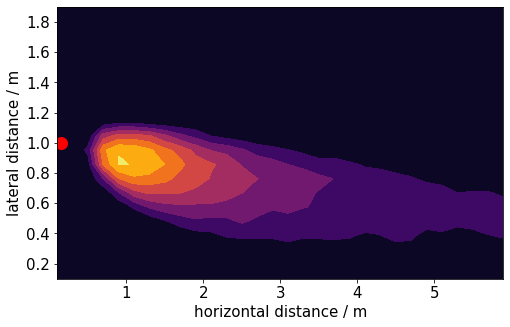

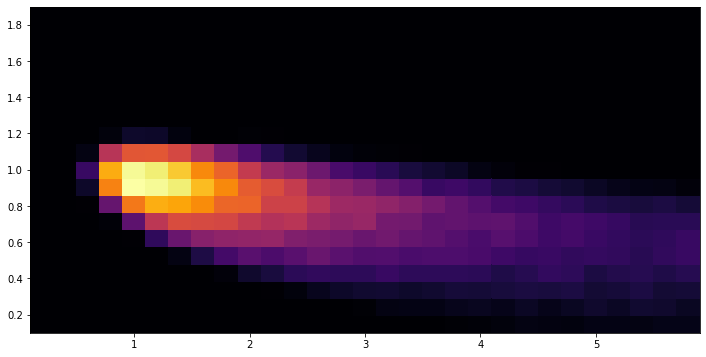

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

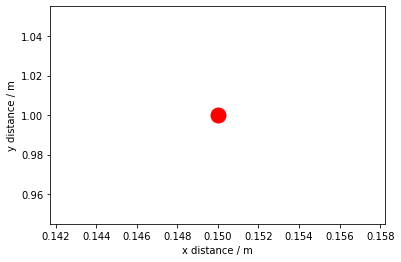

In [95]:
x_cords = np.linspace(0.1, 5.9, 30)
y_cords = np.linspace(0.1, 1.9, 20)

xv, yv = np.meshgrid(x_cords, y_cords, sparse=False, indexing='ij')
# one timestep only
df = d
# source coords
x_s = 0.15
y_s = 1
# populate z set
z = np.zeros((30, 20))
for x in range(30):
    for y in range(20):
        z[x,y] = df[x, y]
# contour plot
fig, ax = plt.subplots(figsize=(8,5))
ax.contourf(xv, yv , np.log(z+1), cmap = 'inferno')
ax.plot(x_s, y_s, 'or', markersize = 12)
ax.set_xlabel("horizontal distance / m", fontsize = 15)
ax.set_ylabel("lateral distance / m", fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
# grid plot
plt.figure(figsize=(12,6))
plt.pcolormesh(xv, yv, np.log(z+1), cmap='inferno')
plt.show()
plt.plot(x_s, y_s, 'or', markersize = 15)
plt.xlabel("x distance / m")
plt.ylabel("y distance / m")
plt.colorbar()
plt.show()